Case Study 2: Multi-Class Fine-grained Image Classification with Large Number of Classes and Less Data Availability

Loading and Exploring the Dataset

In [1]:
import scipy as sp
import numpy as np
import pandas as pd
import PIL
import scipy.ndimage as spi
import matplotlib.pyplot as plt
from time import time
%matplotlib inline
np.random.seed(42)

In [2]:
DATASET_PATH = 'T:/The_Folder/Datasets/dog-breeds dataset/train/'
LABEL_PATH = 'T:/The_Folder/Datasets/dog-breeds dataset/labels.csv'

In [3]:
# This function prepares a random batch from the dataset
def load_batch(dataset_df, batch_size = 25):
    batch_df = dataset_df.loc[np.random.permutation(np.arange(0, len(dataset_df)))[:batch_size],:]
    return batch_df
    
# This function plots sample images in specified size and in defined grid
def plot_batch(images_df, grid_width, grid_height, im_scale_x, im_scale_y):
    f, ax = plt.subplots(grid_width, grid_height)
    f.set_size_inches(12, 12)
    
    img_idx = 0
    for i in range(0, grid_width):
        for j in range(0, grid_height):
            ax[i][j].axis('off')
            ax[i][j].set_title(images_df.iloc[img_idx]['breed'][:10])
            ax[i][j].imshow(sp.misc.imresize(spi.imread(DATASET_PATH + images_df.iloc[img_idx]['id']+'.jpg'),
                                             (im_scale_x,im_scale_y)))
            img_idx += 1
            
    plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0, hspace=0.25)

c:\users\darsh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  app.launch_new_instance()
c:\users\darsh\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


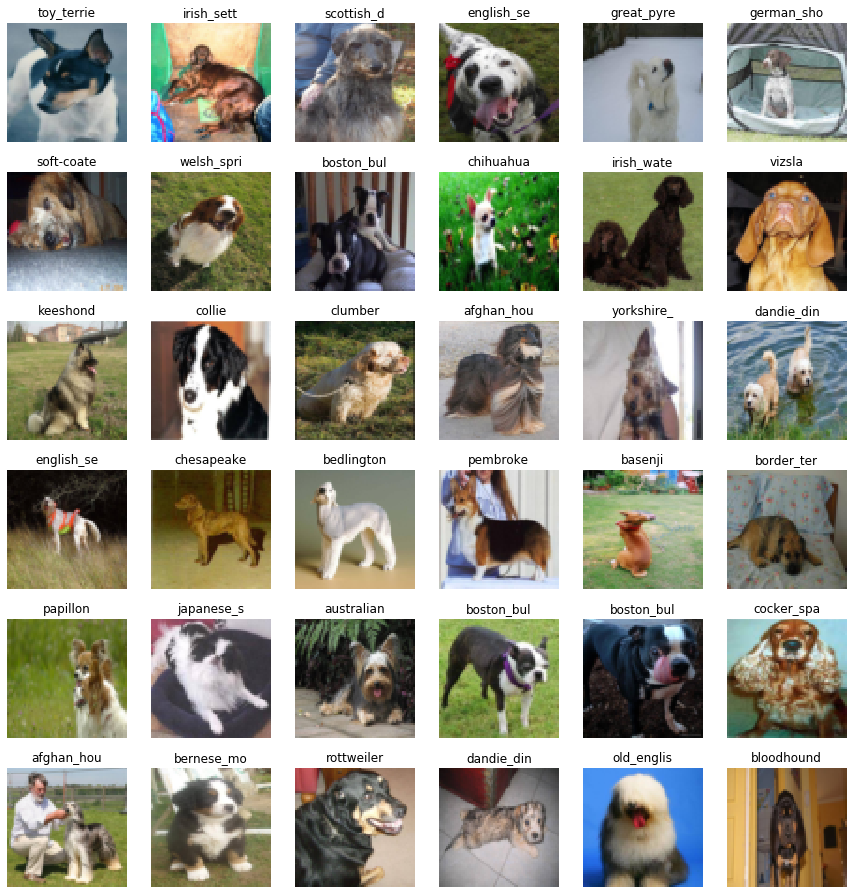

In [4]:
# load dataset and visualize sample data
dataset_df = pd.read_csv(LABEL_PATH)
batch_df = load_batch(dataset_df, batch_size=36)
plot_batch(batch_df, grid_width=6, grid_height=6,
           im_scale_x=64, im_scale_y=64)

Building Datasets

In [5]:
data_labels = pd.read_csv('T:/The_Folder/Datasets/dog-breeds dataset/labels.csv')
target_labels = data_labels['breed']
print(len(set(target_labels)))
data_labels.head()

120


,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [6]:
train_folder = 'T:/The_Folder/Datasets/dog-breeds dataset/train/'
data_labels['image_path'] = data_labels.apply(lambda row: (train_folder + row["id"] + ".jpg" ), axis=1)
data_labels.head()

,id,breed,image_path
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull,T:/The_Folder/Datasets/dog-breeds dataset/trai...
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo,T:/The_Folder/Datasets/dog-breeds dataset/trai...
2,001cdf01b096e06d78e9e5112d419397,pekinese,T:/The_Folder/Datasets/dog-breeds dataset/trai...
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick,T:/The_Folder/Datasets/dog-breeds dataset/trai...
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever,T:/The_Folder/Datasets/dog-breeds dataset/trai...


In [7]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import img_to_array, load_img

Using TensorFlow backend.
c:\users\darsh\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\darsh\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\darsh\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16

In [8]:
# start = time()
# from sys import getsizeof
# #####################################
# i = 3000
# var = np.array([img_to_array(load_img(img, target_size=(299, 299))) for img in data_labels['image_path'].values.tolist()[0:3066]]).astype('float32')
# # (299 * 299 * 3 * 32 * 10222) / (8 * 1024 ** 3)

# ####################################
# print(time() - start, getsizeof(var) / (1024 ** 2))
# var.shape

Load dataset in my own way

In [8]:
# Loading test set
# test set size = 0.3 * 10222 = 3066.6666... = 3066 =====> [0: 0 + 3066] = [0:3066]
start = time()
######################

x_test = np.array([img_to_array(load_img(img, target_size=(299, 299))) for img in data_labels['image_path'].values.tolist()[0:3066]]).astype('float32')
y_test = target_labels[0:3066]

#######################
print("Test Set Loading Time : " + str(time() - start) + " sec")

Test Set Loading Time : 212.6930193901062 sec


In [10]:
# Loading validation set
# Remained datset = 10222 - 3066 = 7156
# test set size = 0.15 * 7156 = 1073.39999... = 1074 =====> [3066: 3066 + 1074] = [3066:4140]
start = time()
######################

x_val = np.array([img_to_array(load_img(img, target_size=(299, 299))) for img in data_labels['image_path'].values.tolist()[3066:4140]]).astype('float32')
y_val = target_labels[3066:4140]

#######################
print("Val Set Loading Time : " + str(time() - start) + " sec")

Val Set Loading Time : 66.85873913764954 sec


In [11]:
# Loading training set
# Remained datset = 7156 - 1074 = 6082
# test set size = 6082 =====> [4140: 4140 + 6082] = [4140:10222]
start = time()
######################

x_train = np.array([img_to_array(load_img(img, target_size=(299, 299))) for img in data_labels['image_path'].values.tolist()[4140:10222]]).astype('float32')
y_train = target_labels[4140:10222]

#######################
print("Train Set Loading Time : " + str(time() - start) + " sec")

Train Set Loading Time : 1169.137974023819 sec


In [12]:
print("Train dataset : ", x_train.shape)
print("Validation dataset : ", x_val.shape)
print("Test dataset : ", x_test.shape)

Train dataset :  (6082, 299, 299, 3)
Validation dataset :  (1074, 299, 299, 3)
Test dataset :  (3066, 299, 299, 3)


In [13]:
pd.DataFrame(pd.get_dummies(y_train.reset_index(drop=True))).to_numpy().shape

(6082, 120)

In [43]:
# y_train_ohe = pd.get_dummies(y_train.reset_index(drop=True)).as_matrix()
# y_val_ohe = pd.get_dummies(y_val.reset_index(drop=True)).as_matrix()
# y_test_ohe = pd.get_dummies(y_test.reset_index(drop=True)).as_matrix()

y_train_ohe = pd.DataFrame(pd.get_dummies(y_train.reset_index(drop=True))).to_numpy()
y_val_ohe = pd.DataFrame(pd.get_dummies(y_val.reset_index(drop=True))).to_numpy()
y_test_ohe = pd.DataFrame(pd.get_dummies(y_test.reset_index(drop=True))).to_numpy()



y_train_ohe.shape, y_test_ohe.shape, y_val_ohe.shape

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 32

# Create train generator.
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=30, 
                                   width_shift_range=0.2,
                                   height_shift_range=0.2, 
                                   horizontal_flip = 'true')
train_generator = train_datagen.flow(x_train, y_train_ohe, shuffle=False, 
                                     batch_size=BATCH_SIZE, seed=1)
                                     
# Create validation generator
val_datagen = ImageDataGenerator(rescale = 1./255)
val_generator = train_datagen.flow(x_val, y_val_ohe, shuffle=False, 
                                   batch_size=BATCH_SIZE, seed=1) 

Transfer Learning with Google’s Inception V3 Model

In [16]:
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dense
from keras.applications.inception_v3 import InceptionV3
from keras.utils.np_utils import to_categorical

In [18]:
# Get the InceptionV3 model so we can do transfer learning
base_inception = InceptionV3(weights='imagenet', include_top=False, 
                             input_shape=(299, 299, 3))

87916544/87910968 [==============================] - 1438s 16us/step


In [19]:
base_inception.save('inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

In [20]:
# Add a global spatial average pooling layer
out = base_inception.output
out = GlobalAveragePooling2D()(out)
out = Dense(512, activation='relu')(out)
out = Dense(512, activation='relu')(out)
total_classes = y_train_ohe.shape[1]
predictions = Dense(total_classes, activation='softmax')(out)

model = Model(inputs=base_inception.input, outputs=predictions)

In [21]:
# only if we want to freeze layers
for layer in base_inception.layers:
    layer.trainable = False

In [22]:
# Compile 
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy']) 

In [23]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 149, 149, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 149, 149, 32) 96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 149, 149, 32) 0           batch_normalization_95[0][0]     
____________________________________________________________________________________________

In [24]:
# Train the model
batch_size = BATCH_SIZE
train_steps_per_epoch = x_train.shape[0] // batch_size
val_steps_per_epoch = x_val.shape[0] // batch_size

history = model.fit_generator(train_generator,
                              steps_per_epoch=train_steps_per_epoch,
                              validation_data=val_generator,
                              validation_steps=val_steps_per_epoch,
                              epochs=15, verbose=1)


Epoch 1/15
190/190 [==============================] - 2544s 13s/step - loss: 4.1172 - accuracy: 0.2167 - val_loss: 2.5211 - val_accuracy: 0.5379
Epoch 2/15
190/190 [==============================] - 2279s 12s/step - loss: 2.2040 - accuracy: 0.5706 - val_loss: 1.1500 - val_accuracy: 0.7284
Epoch 3/15
190/190 [==============================] - 2280s 12s/step - loss: 1.3746 - accuracy: 0.6790 - val_loss: 0.7183 - val_accuracy: 0.7802
Epoch 4/15
190/190 [==============================] - 2252s 12s/step - loss: 1.1330 - accuracy: 0.7119 - val_loss: 0.7696 - val_accuracy: 0.7774
Epoch 5/15
190/190 [==============================] - 2191s 12s/step - loss: 1.0149 - accuracy: 0.7240 - val_loss: 0.7099 - val_accuracy: 0.7821
Epoch 6/15
190/190 [==============================] - 2193s 12s/step - loss: 0.9414 - accuracy: 0.7379 - val_loss: 0.9582 - val_accuracy: 0.7850
Epoch 7/15
190/190 [==============================] - 2196s 12s/step - loss: 0.8527 - accuracy: 0.7638 - val_loss: 0.5246 - val_a

In [42]:
model.save('dog_breeds_inception_v3_model_15_epochs.h5')

In [15]:
import keras
model = keras.models.load_model('dog_breeds_inception_v3_model_15_epochs.h5')

In [41]:
import pickle
f = open('dog_breeds_fine_grained_classification_using_inception_v3_hisory', 'wb')
pickle.dump(history, f)
f.close()

In [40]:
f = open('dog_breeds_fine_grained_classification_using_inception_v3_hisory.', 'rb')
history = pickle.load(f)
f.close()

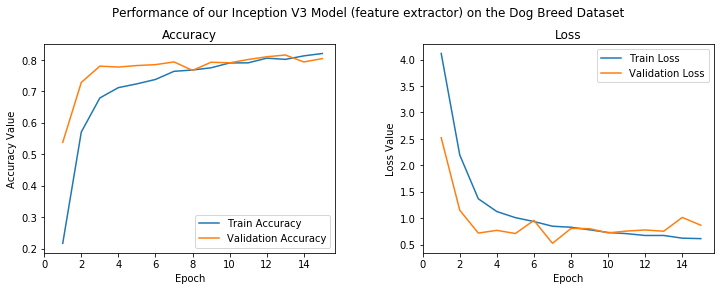

In [116]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Performance of our Inception V3 Model (feature extractor) on the Dog Breed Dataset', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,16))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(0, 16, 2))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 16, 2))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [19]:
# scaling test features
x_test /= 255.


In [20]:
# getting model predictions
test_predictions = model.predict(x_test)


In [21]:
labels_ohe_names = pd.get_dummies(target_labels, sparse=True)

In [22]:
predictions = pd.DataFrame(test_predictions, columns=labels_ohe_names.columns)
predictions

,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,5.497226e-06,2.103524e-06,1.936339e-06,3.232985e-07,2.690109e-05,1.941377e-06,1.747352e-06,2.163490e-04,2.225735e-05,5.399631e-06,...,9.427848e-07,3.988603e-04,3.402364e-07,0.000028,3.438223e-06,2.534107e-07,5.012296e-05,1.758426e-05,1.212234e-05,7.685142e-05
1,2.028576e-07,7.282242e-07,3.532921e-06,3.191475e-06,1.199210e-04,6.644043e-06,1.104374e-07,1.517836e-04,8.302342e-05,1.265072e-04,...,1.548770e-08,2.654109e-04,2.990213e-06,0.001017,6.469654e-06,2.158626e-06,6.929632e-05,5.493469e-04,2.141508e-05,1.104537e-06
2,7.264464e-05,1.078868e-05,6.616798e-09,1.408975e-09,1.201253e-06,3.097530e-09,1.501580e-06,3.586667e-08,4.593102e-07,6.421819e-07,...,1.693660e-06,8.494508e-07,3.471156e-06,0.000001,4.567772e-08,7.583571e-07,3.847753e-04,1.599932e-08,1.143576e-05,3.200856e-03
3,5.829054e-07,5.511193e-06,6.999690e-07,6.681618e-08,9.050154e-07,1.466279e-07,9.020474e-08,2.623671e-08,1.280413e-04,1.458898e-04,...,1.525100e-08,6.186286e-06,4.562928e-07,0.000899,6.966492e-07,1.680527e-06,4.926546e-07,1.223570e-07,8.071721e-07,2.708011e-06
4,9.243723e-07,4.026388e-06,3.305683e-06,1.744504e-05,8.917131e-05,3.174146e-06,6.925596e-08,2.150928e-06,3.899477e-04,8.872028e-03,...,5.523189e-08,4.365916e-06,3.828035e-04,0.035776,1.652801e-05,4.997498e-05,2.214026e-05,4.472250e-05,9.835727e-05,7.833119e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061,1.618041e-06,3.133069e-06,5.616987e-06,2.281423e-04,4.262909e-04,6.948046e-03,2.104812e-04,2.914531e-03,8.124468e-05,3.040716e-04,...,4.117643e-06,1.025854e-02,2.823218e-05,0.000215,2.249861e-05,3.662372e-05,2.312852e-04,1.290913e-04,1.018644e-04,7.127060e-05
3062,5.377669e-06,2.694803e-03,5.390169e-05,5.646521e-05,4.153332e-05,1.862906e-05,1.783296e-05,1.551123e-04,1.334584e-04,8.376349e-06,...,7.224629e-05,3.611518e-06,3.670987e-05,0.000012,1.244604e-05,4.756803e-05,7.944602e-04,9.580822e-05,3.038829e-04,2.702006e-05
3063,4.106155e-07,1.088959e-08,6.566385e-08,1.011305e-08,1.838159e-04,5.928931e-08,1.563394e-08,1.128914e-05,2.160534e-07,2.829627e-07,...,2.621321e-07,1.942541e-07,4.365679e-06,0.000004,7.066392e-07,7.565506e-08,2.328723e-07,3.408973e-05,2.012854e-07,2.816164e-07
3064,5.172228e-07,4.165793e-06,8.493129e-08,8.816937e-07,2.176499e-06,7.099101e-07,6.014116e-08,7.809418e-06,1.424568e-03,9.254509e-01,...,1.854794e-07,4.809926e-06,1.114453e-05,0.039532,2.231203e-06,1.432141e-05,6.416406e-06,2.403641e-06,3.778710e-05,6.502442e-07


In [23]:

predictions = list(predictions.idxmax(axis=1))
test_labels = list(y_test)

In [24]:
# evaluate model performance
import model_evaluation_utils as meu
meu.get_metrics(true_labels=test_labels, 
                predicted_labels=predictions)

Accuracy: 0.8679
Precision: 0.8824
Recall: 0.8679
F1 Score: 0.8656


In [25]:
meu.display_classification_report(true_labels=test_labels, 
                                  predicted_labels=predictions, 
                                  classes=list(labels_ohe_names.columns))

                                precision    recall  f1-score   support

                 affenpinscher       0.86      0.83      0.84        23
                  afghan_hound       1.00      1.00      1.00        30
           african_hunting_dog       1.00      1.00      1.00        20
                      airedale       0.94      0.83      0.88        35
american_staffordshire_terrier       0.78      0.95      0.86        19
                   appenzeller       1.00      0.62      0.77        24
            australian_terrier       0.80      0.75      0.77        32
                       basenji       0.82      0.94      0.88        35
                        basset       0.82      0.93      0.87        29
                        beagle       0.78      0.97      0.86        29
            bedlington_terrier       1.00      1.00      1.00        37
          bernese_mountain_dog       0.82      0.97      0.89        37
       black-and-tan_coonhound       0.78      0.86      0.82  

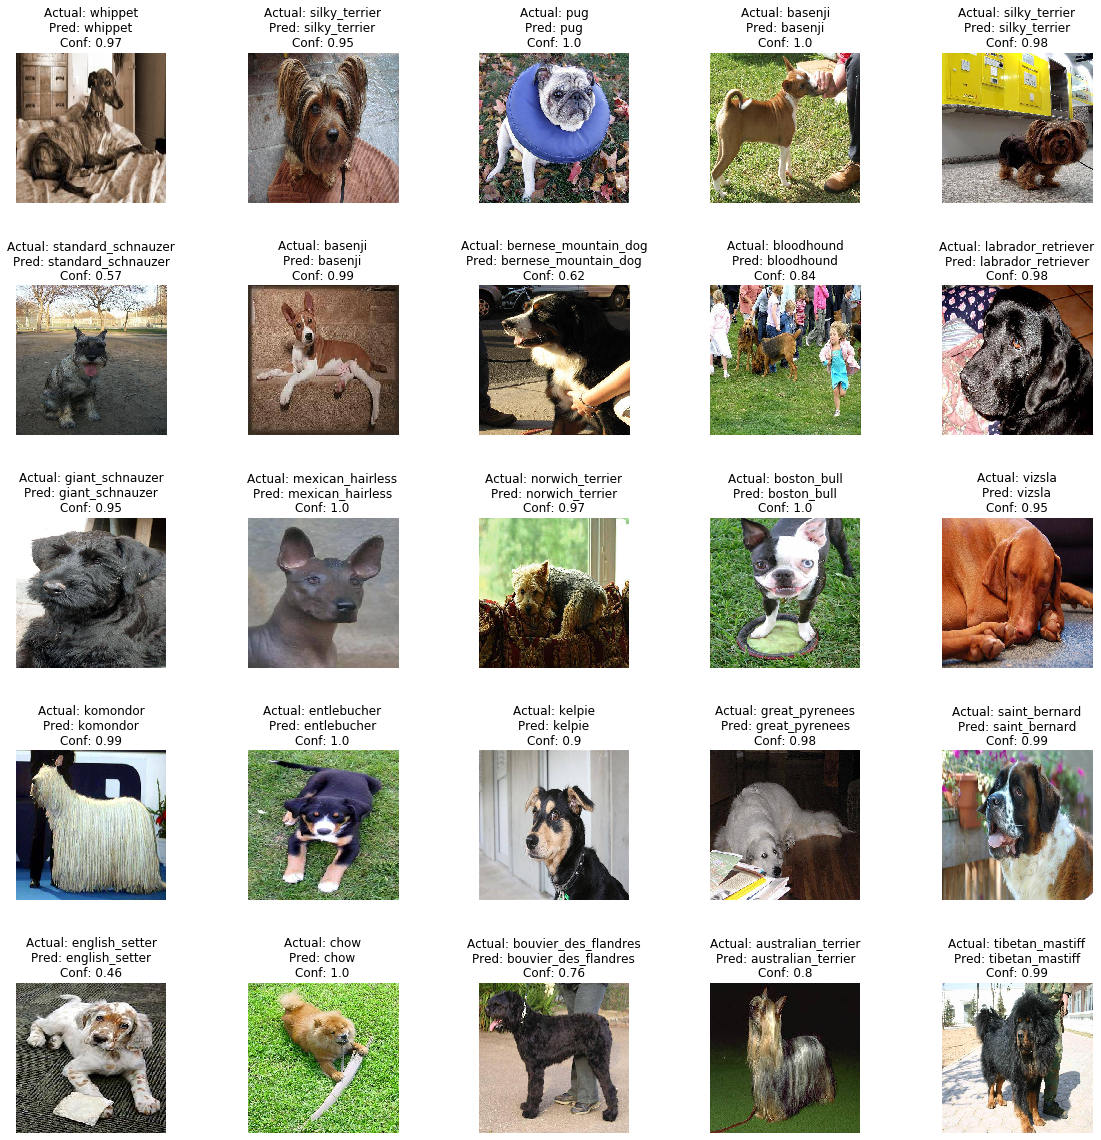

In [38]:
grid_width = 5
grid_height = 5
f, ax = plt.subplots(grid_width, grid_height)
f.set_size_inches(15, 15)
batch_size = 25
dataset = x_test

labels_ohe_names = pd.get_dummies(target_labels, sparse=True)
labels_ohe = np.asarray(labels_ohe_names)
label_dict = dict(enumerate(labels_ohe_names.columns.values))
model_input_shape = (1,)+model.get_input_shape_at(0)[1:]
random_batch_indx = np.random.permutation(np.arange(0,len(dataset)))[:batch_size]

img_idx = 0
for i in range(0, grid_width):
    for j in range(0, grid_height):
        actual_label = np.array(y_test)[random_batch_indx[img_idx]]
        prediction = model.predict(dataset[random_batch_indx[img_idx]].reshape(model_input_shape))[0]
        label_idx = np.argmax(prediction)
        predicted_label = label_dict.get(label_idx)
        conf = round(prediction[label_idx], 2)
        ax[i][j].axis('off')
        ax[i][j].set_title('Actual: '+actual_label+'\nPred: '+predicted_label + '\nConf: ' +str(conf))
        ax[i][j].imshow(dataset[random_batch_indx[img_idx]])
        img_idx += 1

plt.subplots_adjust(left=0, bottom=0, right=1, top=1, wspace=0.5, hspace=0.55)  